# Forest Cover Map
Input: 
- Forest4model_v1_Forest_cover

Aim:
- Visualising forest cover in sample countries
- Calculating total forest cover map in EU countries

Output:
- A dataframe containing total area of forest cover in 32 EU countries

In [11]:
# Vector data
import geopandas as gpd

# Tabular data 
import pandas as pd
import numpy as np

# Raster array
import xarray as xr
import rioxarray as rio
from rasterio.enums import Resampling

# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

# System
from pathlib import Path
import os
import copy

# Import functions from geo_tools module
import sys
sys.path.append("/mnt/PROVIDE/firzar/forest_data_analysis/src")
import geo_tools
from geo_tools import utils, plot_iso_forest

# Reloads module
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Output directory

In [12]:
# Specify the desired output folder path for processed dataset
output_data_dir = Path.cwd() / ".." / "output_data"

# Check if the output folder exists, and create if not
Path.mkdir(output_data_dir, exist_ok=True, parents=True)

In [13]:
# Specify the desired output folder path for figures
output_figure_dir = Path.cwd() / ".." / "output_figures"

# Check if the output folder exists, and create if not
Path.mkdir(output_figure_dir, exist_ok=True, parents=True)

# A list of ISO3 codes of EU countries

In [14]:
eu_iso3 = pd.read_csv(output_data_dir/"Country_Codes_and_Names_ISO3.csv")

eu_iso = eu_iso3["ISO3"]

# Plotting data distribution

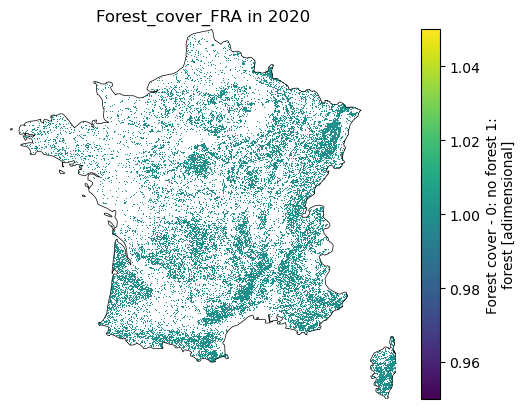

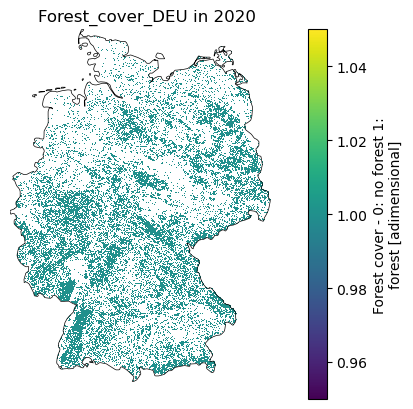

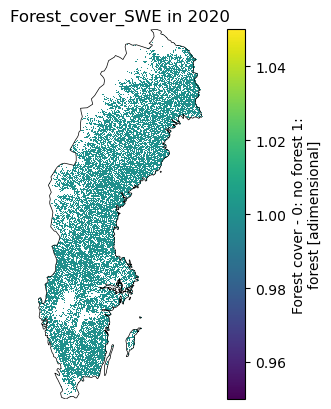

In [5]:
# Testing plot_iso_forest for many countries at once
for iso in ["FRA", "DEU", "SWE"]:
    plot_iso_forest.plot_forest(
        iso_code=iso,
        xarray_id="Forest_cover"
    )

# Calculating area

In [15]:
%%time

forest_cover = []
for eu in eu_iso:
    iso_forest_cover = plot_iso_forest.agg_total_area(
        iso_code=eu, 
        xarray_id="Forest_cover", 
        forest_layer_year=2020,
    )

    forest_cover.append(iso_forest_cover)

CPU times: user 46 s, sys: 8.72 s, total: 54.8 s
Wall time: 57.7 s


In [16]:
forest_cover_df = pd.concat(forest_cover)

In [18]:
# Export as a CSV
forest_cover_df.to_csv(output_data_dir/"iso_forest_cover_stats.csv")